<a href="https://colab.research.google.com/github/movmarkio/AiDataQualityAnalyst/blob/main/ElevateSensor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas numpy matplotlib plotly

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
url = '/predictive-maintenance-dataset.csv'  # Update with the actual path to your data file
data = pd.read_csv(url)

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Fill missing values with column mean if any
data.fillna(data.mean(), inplace=True)

# Example: Let's create a synthetic target variable
# Assuming we want to predict if maintenance is needed based on vibration (binary classification)
data['maintenance_needed'] = (data['vibration'] > 20).astype(int)  # Example threshold of 20

# Define input features and target
X = data[['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']]  # Input features
y = data['maintenance_needed']  # Target variable (binary)

# Check the first few rows to confirm
print(data.head())


Missing Values:
 ID                0
revolutions       0
humidity          0
vibration      2438
x1                0
x2                0
x3                0
x4                0
x5                0
dtype: int64
   ID  revolutions  humidity  vibration       x1      x2        x3  \
0   1       93.744    73.999       18.0  167.743  19.745  1.266828   
1   2       93.740    73.999       18.0  167.739  19.741  1.266774   
2   3       93.736    73.998       18.0  167.734  19.738  1.266737   
3   4       93.732    73.998       18.0  167.730  19.734  1.266683   
4   5       93.729    73.998       18.0  167.727  19.731  1.266642   

            x4           x5  maintenance_needed  
0  8787.937536  5475.852001                   0  
1  8787.187600  5475.852001                   0  
2  8786.437696  5475.704004                   0  
3  8785.687824  5475.704004                   0  
4  8785.125441  5475.704004                   0  


In [3]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (89600, 8)
Test data shape: (22401, 8)


In [4]:
# Feature scaling
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm scaling by checking the mean and standard deviation
print(f"Training data mean: {X_train_scaled.mean(axis=0)}")
print(f"Training data std: {X_train_scaled.std(axis=0)}")


Training data mean: [ 6.34413157e-17  1.52013323e-15  1.42108547e-16 -2.54716883e-16
  8.24737104e-18  4.06658834e-16  2.72797657e-17 -1.45336124e-15]
Training data std: [1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
# Initialize RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = model.predict(X_test_scaled)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     10322
           1       1.00      1.00      1.00     12079

    accuracy                           1.00     22401
   macro avg       1.00      1.00      1.00     22401
weighted avg       1.00      1.00      1.00     22401

Confusion Matrix:
 [[10322     0]
 [    0 12079]]


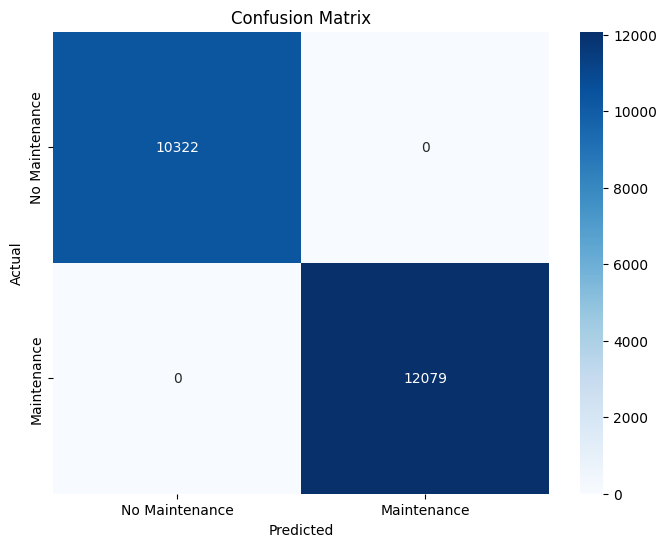

In [6]:
# Evaluate the model performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Maintenance', 'Maintenance'], yticklabels=['No Maintenance', 'Maintenance'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


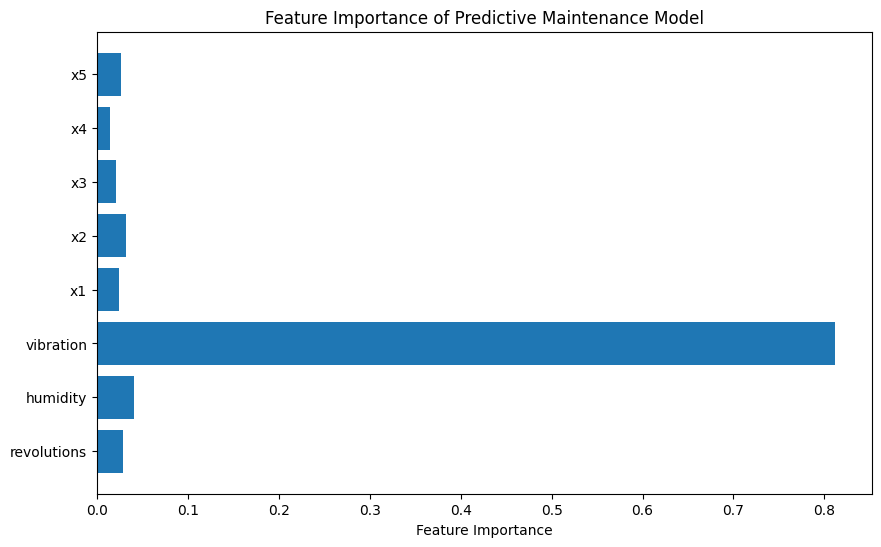

In [7]:
# Plotting feature importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Feature Importance of Predictive Maintenance Model')
plt.show()


In [8]:
# Step 12: Save the trained model using joblib or pickle
import joblib

# Save the model to a file
joblib.dump(model, 'predictive_maintenance_model.pkl')


['predictive_maintenance_model.pkl']